# 1. Classificazione SoftMax

Abbiamo visto come sia possibile "trasformare" un regressore lineare in un classificatore binario utilizzando la funzione logistica. Abbiamo anche visto che è possibile implementare un classificatore multiclasse mediante il principio "one-vs-all". Tuttavia, il principio one-vs-all è poco naturale per risolvere problemi di classificazione multiclasse. Un regressore logistico ci permette di stimare la probabilità:

$$
p(c \mid x) \tag{1}
$$

dove $c$ è la classe ($c = 0$ nel caso della classe negativa e $c = 1$ nel caso della classe positiva) e $x$ è il campione in ingresso. Sappiamo inoltre che

$$
p(c = 0 \mid x) + p(c = 1 \mid x) = 1 \tag{2}
$$

per cui il un regressore logistico ci permette di stimare la distribuzione di probabilità condizionale sulle classi possibili (solo due in questo caso), dato il campione in ingresso $x$.

Supponiamo adesso di avere un problema di classificazione su $K$ classi $c = 0, c = 1, \ldots, c = K - 1$. Il principio "one-vs-all" ci permette di classificare gli elementi $x$, ma non di stimare direttamente una distribuzione di probabilità condizionale sulle classi dato il campione in ingresso mostrato di seguito:

$$
p(c \mid x) : p(c = 0 \mid x) + p(c = 1 \mid x) + \ldots + p(c = K \mid x) = 1 \tag{3}
$$

---

### Domanda 1

> A cosa può servire stimare le probabilità a posteriori $p(c \mid x)$ oltre a inferire la classe più probabile per il campione $x$ ?

Stimare le probabilità a posteriori $p(c \mid x)$ serve non solo a determinare la classe più probabile, ma offre diversi vantaggi pratici e teorici:

1. Decisioni più informate: conoscere la probabilità associata a ciascuna classe permette di valutare la confidenza del modello nella sua previsione. Ad esempio, una predizione con $p = 0.99$ è molto più affidabile di una con $p = 0.51$, anche se entrambe indicano la stessa classe più probabile.

2. Classificazione con soglie personalizzate: in problemi dove gli errori hanno costi diversi (es. medicina, finanza), le probabilità permettono di definire soglie di decisione più adatte al contesto, anziché classificare sempre in base alla massima probabilità.

3. Integrazione in sistemi complessi: le probabilità a posteriori possono essere usate in modelli probabilistici più grandi (es. reti bayesiane, modelli sequenziali) o come input in sistemi decisionali, dove è utile avere una stima di incertezza.

4. Valutazione più dettagliata dei modelli: l’uso di probabilità consente metriche più raffinate come log-loss, cross-entropy, curva ROC e AUC, e permette di verificare se il modello è ben calibrato (cioè se le probabilità stimate corrispondono a frequenze reali).

5. Combinazione di modelli: in metodi di ensemble learning o model averaging, è utile combinare probabilità (soft voting) piuttosto che semplici decisioni secche (hard voting), ottenendo spesso migliori performance.

In sintesi, stimare $p(c \mid x)$ consente un uso più flessibile, robusto e informato dei modelli di classificazione, andando ben oltre la sola scelta della classe più probabile.

---

Se volessimo ottenere una distribuzione di probabilità sulle $K$ classi, potremmo pensare di costruire un regressore lineare che, preso in input un dato, restituisce un vettore di $K$ elementi. Ciò può essere ottenuto semplicemente con una trasformazione lineare del tipo $z = Ax + b$, dove $A$ è una matrice $n \times K$, con $n$ numero di feature in ingresso. Analogamente a quanto visto nel caso del regressore logistico, tuttavia, non vi è alcuna garanzia che il vettore $z$ rappresenti una valida distribuzione di probabilità. Ricordiamo che affinché ciò accada ci serve che:

* $z_i \ge 0, \ \forall i \in \{1, \ldots, K\}$
* $\sum_{i=1}^K z_i = 1$

La funzione SoftMax è una generalizzazione della funzione logistica che ci permette di normalizzare un vettore arbitrario di numeri in modo che rispetti le due proprietà appena viste:

$$
\sigma(x_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} \tag{4}
$$

dove $z_j$ rappresenta la $j$-esima componente del vettore $z$ (e dunque $\sigma(x_j)$ rappresenta la $j$-esima componente del vettore normalizzato mediante SoftMax $\sigma(x)$).

In pratica, la funzione SoftMax esegue due operazioni:

* Applica la funzione esponenziale a tutte le componenti del vettore non normalizzato $z$. Questa operazione permette di soddisfare la prima proprietà mappando numeri $x \in [-\infty, +\infty]$ su numeri del range $[0, +\infty]$. Si noti che la funzione esponenziale è monotona crescente, per cui se $z_i \le z_j$, allora $e^{z_i} \le e^{z_j}$.
* Normalizza gli elementi del vettore in uscita dividendoli per la somma dei valori positivi $e^{z_i} \left( \frac{e^zi}{\sum{z_k}} \right)$. Questa normalizzazione ci assicura che la seconda proprietà sia rispettata: $\sum_{i=1}^K \sigma(z_i) = 1$.

### Domanda 2

> Cosa garantisce che i valori restituiti dalla funzione SoftMax siano non negativi? Disegnare la funzione esponenziale per rispondere alla domanda.

I valori restituiti dalla funzione SoftMax sono sempre non negativi perché la funzione applica, come primo passo, l’esponenziale a ciascun elemento del vettore $z$. La funzione esponenziale $f(z) = e^z$ ha la proprietà fondamentale di essere sempre positiva per ogni valore reale di $z$, cioè:

$$
e^z > 0 \quad \text{per ogni } z \in \mathbb{R}
$$

Questo significa che, anche se un componente $z_j$ è negativo, $e^{z_j}$ sarà comunque positivo (sebbene molto vicino a zero per valori molto negativi). La SoftMax calcola poi:

$$
\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}
$$

dove:

* Il numeratore $e^{z_j}$ è positivo;
* Il denominatore è una somma di termini $e^{z_k}$, tutti positivi, quindi positivo anch’esso.

Essendo quindi il rapporto tra due numeri positivi, ogni componente della SoftMax è strettamente positiva (cioè maggiore di zero), e dunque non negativa. Inoltre, la normalizzazione garantisce che la somma dei valori sia uguale a 1, rendendo il vettore un’autentica distribuzione di probabilità.

La forma della funzione esponenziale giustifica questo comportamento:
![grafico](/Users/vincenzovillanova/Desktop/ML/grafico.jpg)

Come mostra il grafico, la funzione $e^z$ è sempre positiva e monotona crescente, motivo per cui la SoftMax può garantire che tutti i valori siano non negativi e sommati diano 1.

---

La formulazione del regressore SoftMax è dunque la seguente:

$$
f(x) = \sigma(Ax + b) = \sigma(z) = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}} \tag{5}
$$

dove $z = Ax + b$, la funzione $f$ stima la probabilità a posteriori che $x$ appartenga ad una data classe:

$$
p(c = i \mid x) = f(x)_i \tag{6}
$$

e $f(x)_i$ indica la i-esima componente del vettore di probabilità ottenuto mediante il regressore softmax $f$.

Per allenare il regressore softmax, utilizziamo una generalizzazione della loss vista nel caso del regressore logistico: la cross entropy loss.
In teoria dell’informazione, la cross entropy tra due distribuzioni di probabilità $p$ e $q$ è definita come:

$$
H(p, q) = -\sum_x p(x) \log q(x) \tag{7}
$$

La cross entropy $H(p, q)$ indica il numero medio di bit necessario per identificare eventi $x$ che seguono la probabilità $p$ se li descriviamo con la probabilità stimata $q$.
La cross entropy raggiunge il suo minimo quando $p$ e $q$ sono uguali. In tal caso la cross entropy corrisponde all’entropia di $p$:

$$
H(p) = -\sum_x p(x) \log p(x) \tag{8}
$$

Nel nostro caso, la probabilità $q$ è data dal regressore softmax, mentre $p$ rappresenta la probabilità “ideale” che il campione $x$ appartenga a una data classe.
Dato che conosciamo le classi di appartenenza di ogni campione, la probabilità ideale è data da una rappresentazione di tipo "one-hot-vector", in cui $p(x) = \mathbf{y}$ e y ha una unica componente $y_j = 1$, mentre tutte le altre sono nulle.
Ad esempio, se le classi sono tre e il campione appartiene alla seconda classe ($c = 1$), allora $\mathbf{y} = [0, 1, 0]$.

---

### Domanda 3

> I vettori "one-hot" sono delle valide distribuzioni di probabilità?

Sì, i vettori one-hot sono valide distribuzioni di probabilità perché soddisfano le due condizioni fondamentali: tutte le componenti sono non negative e la loro somma è pari a 1. Rappresentano una distribuzione deterministica, in cui tutta la probabilità è assegnata a una sola classe.

---

Possiamo dunque scrivere la loss relativa a un dato campione $x$ di etichetta one-hot $\mathbf{y}$ come segue:

$$
L_\theta(x, \mathbf{y}) = -\sum_i y_i \log f(x)_i \tag{9}
$$


Notiamo che $\mathbf{y}_i$ sarà uguale a zero tranne che per $i = j$, dove $j$ è la classe del campione $\mathbf{x}$.
Pertanto, solo uno dei termini della sommatoria nella formula sopra sarà non nullo.
Ciò ci permette di riscrivere la loss come segue:

$$
L_\theta(x, j) = -\log f(x)_j \tag{10}
$$

Dove $j$ è la classe di $\mathbf{x}$. Ricordando che $f(x) = \sigma(Ax + b) = \sigma(z) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$, possiamo riscrivere la loss come:

$$
L_\theta(x, j) = -\log \left( \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} \right) = \log \sum_{k=1}^K e^{z_k} - \log e^{z_j} \tag{11}
$$

da cui, ricordando che $\mathbf{z} = A\mathbf{x} + \mathbf{b}$, abbiamo:

$$
L_\theta(x, j) = \log \sum_{k=1}^K e^{z_k} - z_j \tag{12}
$$

# 1.1 Implementazione di un Regressore Softmax

In [177]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target

# Features
print(X.shape)

# Classi Target
print(Y.shape)

print(Y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [178]:
# Impostimo un seed per avere risultati ripetibili

import torch
import numpy as np

np.random.seed(1234)
torch.random.manual_seed(1234)

In [179]:
idx = np.random.permutation(len(X))

In [180]:
X = X[idx]
Y = Y[idx]

In [181]:
from torch import Tensor

X_training = Tensor(X[30:])
Y_training = Tensor(Y[30:])
X_testing = Tensor(X[:30])
Y_testing = Tensor(Y[:30])

In [182]:
X_mean = X_training.mean(0)
X_std = X_training.std(0)

X_training_norm = (X_training - X_mean) / X_std
X_testing_norm = (X_testing - X_mean) / X_std

In [183]:
from torch import nn


class SoftMaxRegressor(nn.Module):
    def __init__(self, in_features, out_classes):
        super(SoftMaxRegressor, self).__init__()
        self.linear = nn.Linear(in_features, out_classes)

    def forward(self, x):
        scores = self.linear(x)
        return scores

In [184]:
model = SoftMaxRegressor(4, 3)  # 4 feature in ingresso e 3 classi in uscita
model(X_training_norm)[:10]

tensor([[ 0.9326,  0.6582, -0.2940],
        [-0.1301, -0.2885,  0.1746],
        [ 1.1440,  1.6170, -1.0236],
        [-0.1766, -0.4061,  0.2196],
        [-0.4706, -0.5166,  0.2307],
        [ 1.2162,  1.5326, -0.9408],
        [ 1.6219,  1.6549, -0.9210],
        [ 0.8984,  1.2598, -0.8457],
        [ 1.4105,  1.9569, -1.2018],
        [ 1.0097,  0.5520, -0.2012]], grad_fn=<SliceBackward0>)

In [185]:
softmax = nn.Softmax(dim=1)  # 1 perché per righe
softmax(model(X_training_norm))[:10]

tensor([[0.4870, 0.3701, 0.1428],
        [0.3116, 0.2659, 0.4225],
        [0.3678, 0.5902, 0.0421],
        [0.3048, 0.2423, 0.4529],
        [0.2518, 0.2405, 0.5077],
        [0.4020, 0.5516, 0.0465],
        [0.4734, 0.4893, 0.0372],
        [0.3831, 0.5499, 0.0670],
        [0.3571, 0.6167, 0.0262],
        [0.5180, 0.3277, 0.1543]], grad_fn=<SliceBackward0>)

In [186]:
softmax(model(X_training_norm)).sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

# Domanda 4 
Perché è stata calcolata la funzione softmax per righe? 

La funzione softmax è calcolata per righe (`dim=1`) perché ogni riga rappresenta un campione, e la softmax deve restituire una distribuzione di probabilità sulle classi per ciascun campione. In questo modo, i valori di ogni riga vengono normalizzati affinché sommino a 1, interpretandoli come probabilità che il campione appartenga a ciascuna classe.


In [187]:
# La funziona max restituisce i valori dei massimi e i loro indici (il risultato della funzione argmax)
# per questo includiamo "[1]" nell'equazione successiva

preds = softmax(model(X_training_norm)).max(1)[1]
preds

tensor([0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
        0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0,
        1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1])

In [188]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_training, preds))

0.35833333333333334


In [189]:
preds_logits = model(X_training_norm).argmax(1)
print(preds_logits)
print((preds_logits == preds))

tensor([0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
        0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0,
        1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1])
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, T

In pratica, si preferisce dunque non applicare la funzione softmax per il calcolo delle etichette predette.

La procedura di training del regressore logistico sarà la seguente:

1. Normalizzare i dati in ingresso x;
2. Costruire il modulo che implementa il modello (il costruttore si preoccuperà di inizializzare i parametri);
3. Mettere il modello in modalità "training";
4. Calcolare l'output del modello ŷ;
5. Calcolare il valore della loss ℒₜₕₑₜₐ(x, y);
6. Calcolare il gradiente della loss rispetto ai parametri del modello;
7. Aggiornare i pesi θ utilizzando il gradient descent;
8. Ripetere i passi 4–7 fino a convergenza.

Implementiamo la procedura includendo il monitoring delle curve mediante tensorboard e il calcolo dell'accuracy ad ogni iterazione.

In [190]:
from torch.utils.tensorboard import SummaryWriter
from torch.optim import SGD

writer = SummaryWriter("logs/softmax_regressor")

lr = 0.01
epochs = 500


means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training - means) / stds
X_testing_norm = (X_testing - means) / stds

model = SoftMaxRegressor(4, 3)

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr)

for e in range(epochs):
    model.train()
    out = model(X_training_norm)
    l = criterion(out, Y_training.long())
    l.backward()
    writer.add_scalar("loss/train", l.item(), global_step=e)
    optimizer.step()
    optimizer.zero_grad()

    preds_train = out.max(1)[1]
    writer.add_scalar(
        "accuracy/train", accuracy_score(Y_training, preds_train), global_step=e
    )

    model.eval()
    with torch.set_grad_enabled(False):
        out = model(X_testing_norm)
        l = criterion(out, Y_testing.long())
        writer.add_scalar("loss/test", l.item(), global_step=e)
        preds_test = out.max(1)[1]
        writer.add_scalar(
            "accuracy/test", accuracy_score(Y_testing, preds_test), global_step=e
        )

In [191]:
preds_train = model(X_training_norm).max(1)[1]
preds_test = model(X_testing_norm).max(1)[1]
print("Accurancy di training ", accuracy_score(Y_training, preds_train))
print("Accurancy di testing ", accuracy_score(Y_testing, preds_test))

Accurancy di training  0.8666666666666667
Accurancy di testing  0.9333333333333333


# 2. Datasets, Data Loaders, Stochastic Gradient Descent, Salvataggio e Caricamento dei modelli

Inizialmente, il gradiente viene calcolato sull'intero dataset (Batch Gradient Descent), ma questo approccio può diventare impraticabile per dataset molto grandi. Per ovviare al problema, si utilizza lo Stochastic Gradient Descent (SGD), che suddivide i dati in mini-batch e calcola il gradiente su uno alla volta. Come esempio, viene introdotto il dataset MNIST, composto da 70.000 immagini di cifre scritte a mano (28×28 pixel), suddivise in 60.000 per il training e 10.000 per il test.

In [192]:
from torchvision.datasets import MNIST

mnist_train = MNIST(
    root="data", train=True, download=True
)  # Train=True indica che vogliamo caricare il training set
mnist_test = MNIST(root="data", train=False, download=True)

In [193]:
print("Numero di campioni di training: ", len(mnist_train))
print("Numero di campioni di testing: ", len(mnist_test))

Numero di campioni di training:  60000
Numero di campioni di testing:  10000


In [194]:
print(mnist_train[0])
print(mnist_test[0])

print(type(mnist_train[0][0]))
print(type(mnist_train[0][1]))

# Il primo parametro è un immagine il secondo l'etichetta corrispondente

(<PIL.Image.Image image mode=L size=28x28 at 0x34D830A30>, 5)
(<PIL.Image.Image image mode=L size=28x28 at 0x34D830DC0>, 7)
<class 'PIL.Image.Image'>
<class 'int'>


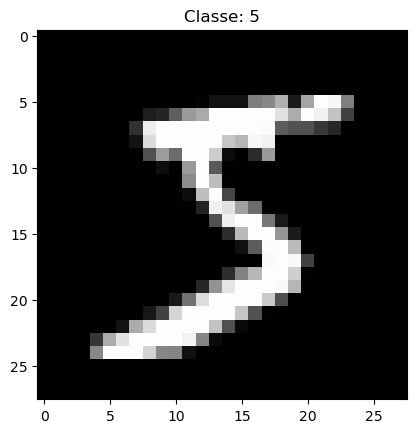

In [195]:
from matplotlib import pyplot as plt

plt.imshow(mnist_train[0][0], cmap="gray")
plt.title("Classe: " + str(mnist_train[0][1]))
plt.show()

In [196]:
im = torch.from_numpy(np.array(mnist_train[0][0]))
im.shape

torch.Size([28, 28])

In [197]:
from torchvision import transforms

mnist_train = MNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()
)
mnist_test = MNIST(
    root="data", train=False, download=True, transform=transforms.ToTensor()
)

In [198]:
sample = mnist_train[0]
print(type(sample[0]))
print(type(sample[1]))

<class 'torch.Tensor'>
<class 'int'>


In [199]:
print(mnist_train[0][0].shape)

torch.Size([1, 28, 28])


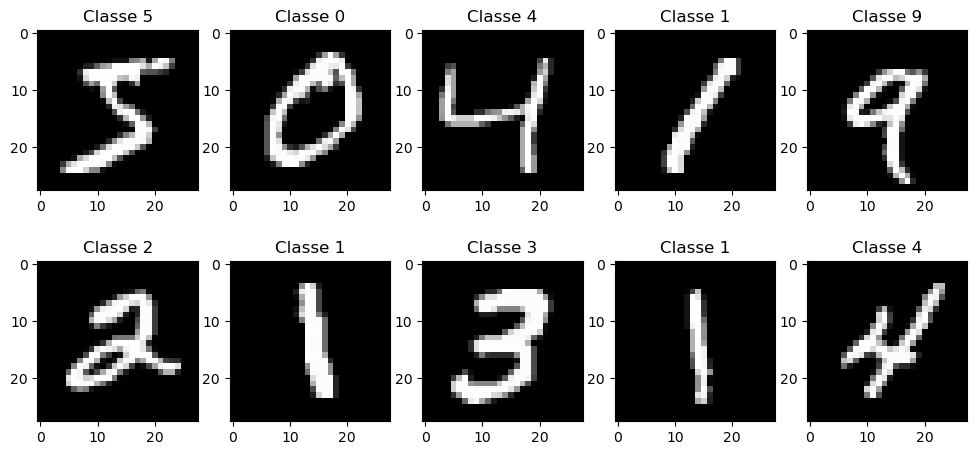

In [200]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5.5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title("Classe %d" % mnist_train[i][1])
    plt.imshow(mnist_train[i][0].squeeze().numpy(), cmap="gray")

In [201]:
# Normalizziamo i dati in modo che abbiano media nulla e deviazione standard pari a 1

m = 0

for sample in mnist_train:
    m += sample[0].sum()

m = m / (len(mnist_train) * 28 * 28)

s = 0

for sample in mnist_train:
    s += ((sample[0] - m) ** 2).sum()

s = np.sqrt(s / (len(mnist_train) * 28 * 28))

In [202]:
print("Mean: %0.4f" % m)
print("Std: %0.4f" % s)

Mean: 0.1307
Std: 0.3081


In [203]:
sample = (mnist_train[15][0] - m) / s
print("Minimo:", sample.min())
print("Massimo:", sample.max())
print("Media:", sample.mean())
print("Deviazione Standard:", sample.std())

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Deviazione Standard: tensor(0.9860)


In [204]:
# Possibile non farlo a mano nel seguente modo:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((m,), (s,))]
)
mnist_train = MNIST(root="data", train=True, download=True, transform=transform)
mnist_test = MNIST(root="data", train=False, download=True, transform=transform)

In [205]:
sample = mnist_train[15][0]
print("Minimo:", sample.min())
print("Massimo:", sample.max())
print("Media:", sample.mean())
print("Deviazione Standard:", sample.std())

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Deviazione Standard: tensor(0.9860)


In [206]:
sample = sample.view(-1)
print(sample.shape)

torch.Size([784])


In [207]:
# Creiamo una funzione custom


def custom_transf(x):
    return x.view(-1)


transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((m,), (s,)),
        transforms.Lambda(custom_transf),
    ]
)
mnist_train = MNIST(root="data", train=True, download=True, transform=transform)
mnist_test = MNIST(root="data", train=False, download=True, transform=transform)

In [208]:
print(mnist_train[0][0].shape)
print(mnist_train[0][1])

torch.Size([784])
5


### 2.2 Data Loader

Ogni campione ottenuto mediante l'oggetto dataset MNIST verrà automaticamente normalizzato e trasformato in un vettore. 
Per effettuare l'ottimizzazione mediante Stochastic Gradient Descent, dobbiamo suddividere i campioni in mini-batch. 

Inoltre, è importante fornire i campioni in ordine casuale, in quanto fornire consecutivamente elementi con caratteristiche simili 
(es. stessa classe) favorirebbe l'overfitting.

PyTorch ci permette di gestire il "batching" in automatico e in maniera multithread mediante l'oggetto DataLoader. 

Utilizziamo un batch size di 256 immagini e due thread paralleli per velocizzare il caricamento dei dati:

In [209]:
from torch.utils.data import DataLoader
mnist_train_loader = DataLoader(mnist_train, batch_size=256, num_workers=2, shuffle=True)
# shuffle permette di accedere ai dati in maniera casuale
mnist_test_loader = DataLoader(mnist_test,batch_size=256,num_workers=0)

# Domanda 6 
Perché non viene eseguito lo "shuffle" sui dati di test?

Lo *shuffle* non viene eseguito sui dati di test perché questi devono rappresentare fedelmente una distribuzione reale e non manipolata dei dati che il modello incontrerà in fase di produzione. 

Mescolare i dati di test potrebbe introdurre una distorsione che renderebbe meno affidabile la valutazione finale delle prestazioni del modello. Inoltre, mantenere l’ordine originale dei dati può essere importante in contesti temporali o sequenziali (come nelle serie temporali), dove l’ordine ha significato.

In sintesi, **i dati di test devono rimanere inalterati per garantire una valutazione oggettiva, realistica e ripetibile del modello.**








In [210]:
for batch in mnist_test_loader:
    break

print(batch[0].shape)
print(batch[1].shape)

torch.Size([256, 784])
torch.Size([256])


In [211]:
for batch in mnist_test_loader:
    pass

print(batch[0].shape)
print(batch[1].shape)

torch.Size([16, 784])
torch.Size([16])


# Salvataggio e caricamento dei modelli

In [212]:
state_dict=model.state_dict()
print(state_dict.keys())

odict_keys(['linear.weight', 'linear.bias'])


In [213]:
import os
os.makedirs("weights",exist_ok=True)
torch.save(model.state_dict(), 'weights/model.pth')

In [214]:
model = SoftMaxRegressor(4,3)
model.load_state_dict(torch.load('weights/model.pth'))

/var/folders/63/50zf744n74q80dznlsp0d0x40000gn/T/ipykernel_29809/3385518273.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('weights/mod

<All keys matched successfully>

# Allenamento su GPU

In [215]:
torch.cuda.is_available()

False

In [216]:
import torch

if torch.backends.mps.is_available():
    device = "mps"  # Apple GPU via Metal
elif torch.cuda.is_available():
    device = "cuda"  # NVIDIA GPU (non disponibile su Mac)
else:
    device = "cpu"   # Fallback

print(f"Using device: {device}")


Using device: mps


In [217]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

In [218]:
model.to(device)

SoftMaxRegressor(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)

In [219]:
X_training_norm.to(device)

tensor([[-0.8943, -1.2295, -0.4128, -0.1262],
        [ 0.4487, -0.5708,  0.6062,  0.7799],
        [-1.0163,  0.9660, -1.3753, -1.1617],
        [ 0.5707, -0.5708,  0.7761,  0.3915],
        [ 1.0591, -0.1317,  0.7195,  0.6504],
        [-1.2605,  0.7465, -1.0356, -1.2911],
        [-1.7488, -0.3513, -1.3187, -1.2911],
        [-0.5280,  0.7465, -1.1488, -1.2911],
        [-1.5047,  1.1856, -1.5451, -1.2911],
        [-1.0163, -1.6686, -0.2430, -0.2556],
        [-0.4059,  0.9660, -1.3753, -1.2911],
        [ 0.4487, -1.8881,  0.4364,  0.3915],
        [-0.7722,  2.2833, -1.2620, -1.4206],
        [ 1.3032,  0.0878,  0.7761,  1.4270],
        [ 1.6695,  0.3074,  1.2856,  0.7799],
        [-1.1384,  0.0878, -1.2620, -1.4206],
        [-0.0397, -0.5708,  0.7761,  1.5565],
        [ 1.0591, -0.1317,  0.8327,  1.4270],
        [ 2.2799, -0.1317,  1.3422,  1.4270],
        [ 1.0591,  0.0878,  1.0592,  1.5565],
        [-1.1384, -0.1317, -1.3187, -1.2911],
        [ 0.8149, -0.1317,  0.8327

# 2.5 Log di loss e accuracy e SGD

Quando si effettua un allenamento mediante stochastic gradient descent, risulta un po' meno immediato effettuare il log di loss e accuracy. In genere, abbiamo conservato i valori di loss e accuracy calcolati su training set e test set alla fine di ogni epoca. Tuttavia, noi calcoleremo esplicitamente loss e accuracy sui singoli batch.

Per ottenere delle stime valide per ogni epoca, accumuleremo i valori di loss e accuracy batch per batch e calcoleremo la media di questi valori pesata sulla base del numero di elementi contenuti in quel batch.  
Supponiamo di avere 3 batch nel dataset, la loss totale va calcolata come segue:

$$
L = \frac{l_0 \cdot n_0 + l_1 \cdot n_1 + l_2 \cdot n_2}{n_0 + n_1 + n_2} \tag{13}
$$

dove $ l_i $ è la loss calcolata al batch i-esimo e $ n_i $ è il numero di elementi contenuti nel batch i-esimo.  
È inoltre possibile calcolare la loss "parziale" ad un batch diverso dal batch finale come segue:

$$
L_1 = \frac{l_0 \cdot n_0 + l_1 \cdot n_1}{n_0 + n_1} \tag{14}
$$

dove $ L_1 $ è la loss parziale calcolata fino al batch 1. Questi calcoli possono essere automatizzati mediante un oggetto chiamato Meter. Scriviamone uno molto semplice:

In [220]:
class AverageValueMeter():
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.num=0
        self.sum=0
        
        
    def add(self,value,num):
        self.sum += value * num
        self.num +=num
        
    def value(self):
        try:
            return self.sum/self.num
        
        except:
            return None

In [221]:
meter = AverageValueMeter()

meter.add(10,3) #inseriamo il valore 10 , calcolato da un batch di 3 elementi
meter.add(3,5) #inseriamo il valore 3 , calcolato da un batch di 5 elementi
meter.add(-1,2) #inseriamo il valore -1 , calcolato da un batch di 2 elementi


#media pesata calcolata manualmente:
print('Media pesata calcolata manualmente:' , (10*3+3*5-1*2)/(3+5+2))
print('Media pesata calcolata mediante meter:' ,meter.value())

Media pesata calcolata manualmente: 4.3
Media pesata calcolata mediante meter: 4.3


In [222]:
meter.reset()
print(meter.value())

None


# 2.5 Allenamento mediante SGD

In [223]:
from os.path import join

def train_classifier(model, train_loader, test_loader, exp_name="experiment", lr=0.001, epochs=10, momentum=0.9, logdir="logs"):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr, momentum=momentum)
    
    # meters
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()

    # writer
    writer = SummaryWriter(join(logdir, exp_name))

    # device
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    model.to(device)

    # definiamo un dizionario contenente i loader di training e test
    loader = {"train": train_loader, "test": test_loader}

    # inizializziamo il global step
    global_step = 0

    for e in range(epochs):
        print(f"Epoch {e+1} of {epochs}")
        # iteriamo tra due modalità: train e test
        for mode in ["train", "test"]:
            loss_meter.reset()
            acc_meter.reset()

            model.train() if mode == "train" else model.eval()

            # abilitiamo i gradienti solo in training
            with torch.set_grad_enabled(mode == "train"):
                for i, batch in enumerate(loader[mode]):
                    x = batch[0].to(device)  # "portiamoli sul device corretto"
                    y = batch[1].to(device)

                    output = model(x)

                    # aggiorniamo il global_step
                    # contiene il numero di campioni visti durante il training
                    n = x.shape[0]  # numero di elementi nel batch
                    global_step += n
                    l = criterion(output, y)

                    if mode == "train":
                        l.backward()
                        optimizer.step()
                        optimizer.zero_grad()

                    acc = accuracy_score(y.to("cpu"), output.to("cpu").max(1)[1])
                    loss_meter.add(l.item(), n)
                    acc_meter.add(acc, n)

            # logghiamo i risultati iterazione per iterazione solo durante il training
            if mode == "train":
                writer.add_scalar("loss/train", loss_meter.value(), global_step=global_step)
                writer.add_scalar("accuracy/train", acc_meter.value(), global_step=global_step)

            # una volta finita l'epoca (sia nel caso di training che test),
            # logghiamo le stime finali
            writer.add_scalar("loss/" + mode, loss_meter.value(), global_step=global_step)
            writer.add_scalar("accuracy/" + mode, acc_meter.value(), global_step=global_step)

        # conserviamo i pesi del modello alla fine di un ciclo di training e test
        torch.save(model.state_dict(), "weights/%s-%d.pth" % (exp_name, e + 1))

    return model

In [224]:
lr = 0.01
epochs = 10 
momentum = 0.9

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((m,), (s,)), 
                                transforms.Lambda(custom_transf)])
mnist_train = MNIST(root="data", train=True, download=True, transform=transform)
mnist_test = MNIST(root="data", train=False, download=True, transform=transform)

mnist_train_loader = DataLoader(mnist_train, batch_size=256, num_workers=0, shuffle=True)

mnist_test_loader = DataLoader(mnist_test,batch_size=256,num_workers=0)

model = SoftMaxRegressor(784,10)

model= train_classifier(model,mnist_train_loader,mnist_test_loader,'SGD-softmax-regressor',lr=lr,epochs=epochs,momentum=momentum)

Epoch 1 of 10
Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10


# Domanda 7

Guardando i grafici ottenuti, sembra possibile migliorare l'accuracy di test allenando il modello per un numero maggiore di epoche? Perché?

In [225]:
def test_classifier(model, loader):
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    model.to(device)
    predictions,labels = [],[]
    for batch in loader:
        x = batch[0].to(device)
        y = batch[1].to(device)
        output = model(x)
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()
        predictions.extend(list(preds))
        labels.extend(list(labs))
    return np.array(predictions),np.array(labels)

In [226]:
predictions_train, labels_train = test_classifier(model,mnist_train_loader)
predictions_test, labels_test = test_classifier(model,mnist_test_loader)
print("Accuracy di training: %0.4f"% accuracy_score(labels_train,predictions_train))
print("Accuracy di test: %0.4f"% accuracy_score(labels_test,predictions_test))

Accuracy di training: 0.9277
Accuracy di test: 0.9225


# Multilayer Perceptron (MLP)

Finora abbiamo considerato modelli lineari semplici per la classificazione e la regressione. Tali modelli possono essere estesi in maniera relativamente semplice a modelli più "profondi", come il Multilayer Perceptron (MLP), utilizzando PyTorch.

Un MLP è composto da tre livelli principali:

1. Input Layer (Livello di ingresso): dove vengono presentati i dati in ingresso.


2. Hidden Layer (Livello nascosto): contiene rappresentazioni "latenti" dei dati.


3. Output Layer (Livello di uscita): fornisce l'output finale (le etichette predette o i valori da regredire).



Il livello nascosto è detto tale perché, durante il training, non viene esercitato un controllo diretto sui suoi valori: la funzione di perdita (loss) è applicata solo al livello di output. Per questo motivo, si dice che il livello nascosto apprende una rappresentazione latente.

Tra questi tre livelli, solo il livello nascosto e il livello di output contengono parametri che possono essere appresi durante l’allenamento. Per questo motivo, spesso si dice che un MLP ha effettivamente due layer (quelli con parametri ottimizzabili).

Tipi di output:

Regressione: l'ultimo livello contiene i valori da regredire.

Classificazione (Softmax Regressor): l'ultimo livello contiene un numero di nodi pari al numero di classi. I valori prodotti (logit) possono essere trasformati in probabilità tramite una funzione softmax.


Concetti chiave:

Learned representation: rappresentazione appresa nel livello nascosto.

Activation function: funzione non lineare (es. ReLU, Sigmoid) applicata tra i layer per introdurre non-linearità nel modello.


# 3.1 Fashion-MNIST
Vedremo degli esempi di classificatori MLP su un'altro dataset simile a MNIST in dimensioni ma più complesso in termini di contenuto visuale: Fashion-MNIST.

Fashion-MNIST è un dataset introdotto da Zalando nel 2017. Il dataset è progettato per essere compatto in maniera simile a MNIST-DIGITS, in modo da poter essere utilizzato in maniera agevole per effettuare esperimenti veloci (utili quando si vuole appurare la bontà di un'idea). Allo stesso tempo, il problema di classificazione proposto con il dataset è molto più complesso di quello relativo a MNIST-DIGITS. In maniera del tutto simile a MNIST-DIGITS, il dataset contiene 60, 000 immagini di training e 10, 000 immagini di testing grandi 28 X 28 pixels. Le immagini sono suddivise in 10 classi relative al mondo della

moda, come riassunto di seguito.

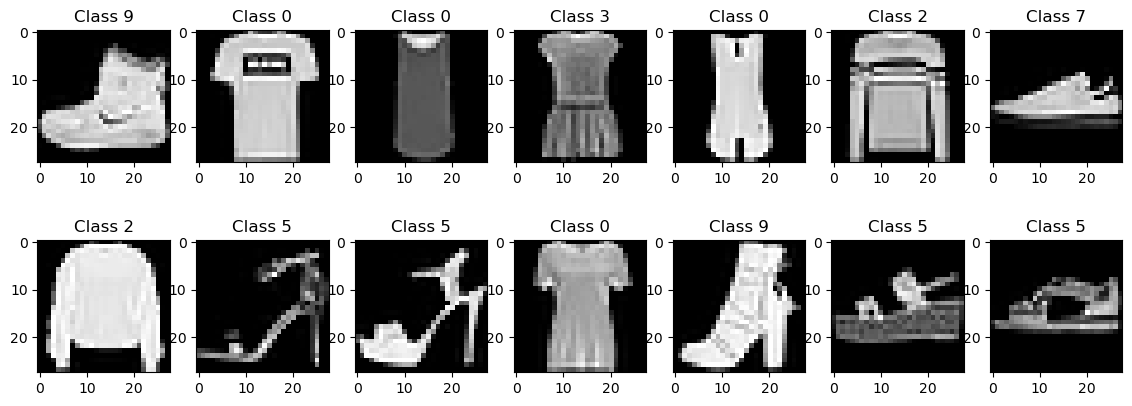

In [227]:
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt
from torchvision import transforms

fashion_train = FashionMNIST(root='fashion',train=True , download=True , transform=transforms.ToTensor())
fashion_test = FashionMNIST(root='fashion',train=False , download=True , transform=transforms.ToTensor())



plt.figure(figsize=(14,5))
for i in range (14):
    plt.subplot(2,7,i+1)
    plt.title("Class %d" % fashion_train[i][1])
    plt.imshow(fashion_train[i][0].squeeze().numpy(),cmap="gray")
    
plt.show()

# Domanda 8

Cosa rende MNIST-Fashion più "complesso" di MNIST-DIGITS ? Fare un esempio considerando qualcuno dei campioni visualizzati.

In [228]:
transform = transforms.Compose([transforms.ToTensor(),   #conversione in tensore 
                               transforms.Normalize((0.2860,),(0.3530,)),
                               transforms.Lambda(custom_transf)
                                ])


#Ridefiniamo i dataset specificando le trasformazioni
fashion_train = FashionMNIST(root='data',train=True , download=True , transform=transform)
fashion_test = FashionMNIST(root='data',train=False , download=True , transform=transform)


#definiamo i dataLoaders
fashion_train_loader = DataLoader(fashion_train,batch_size=256,num_workers=0,shuffle=True)
#shuffle permette di accedere ai dati in maniera casuale
fashion_test_loader = DataLoader(fashion_test,batch_size=256,num_workers=0)

Esploriamo il dataset allenando un regressore SoftMax con il codice di training scritto in precedenza :

In [229]:
fashion_softmax_regressor = SoftMaxRegressor(784,10)
fashion_softmax_regressor = train_classifier(fashion_softmax_regressor,fashion_train_loader,fashion_test_loader,'fashion_softmax_regressor',lr=0.01 , epochs=10)


Epoch 1 of 10
Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10


In [230]:
predictions_train_fashion_softmax_regressor, labels_train_fashion = test_classifier(fashion_softmax_regressor, fashion_train_loader)
predictions_test_fashion_softmax_regressor, labels_test_fashion = test_classifier(fashion_softmax_regressor, fashion_test_loader)

print("Fashion Softmax Regressor - Accuracy di Training: %0.4f"%accuracy_score(labels_train_fashion,predictions_train_fashion_softmax_regressor))
print("Fashion Softmax Regressor - Accuracy di Test: %0.4f"%accuracy_score(labels_test_fashion,predictions_test_fashion_softmax_regressor))


Fashion Softmax Regressor - Accuracy di Training: 0.8637
Fashion Softmax Regressor - Accuracy di Test: 0.8402


# 3.1 Classificatore MLP

In [231]:
class MLPClassifier(nn.Module):
    def __init__(self,in_features,hidden_units,out_classes):
        super(MLPClassifier,self).__init__()
        self.hidden_layer = nn.Linear(in_features,hidden_units)
        self.activation=nn.ReLU()
        self.output_layer = nn.Linear(hidden_units,out_classes)
        
    def forward(self,x):
        hidden_representation = self.hidden_layer(x)
        hidden_representation = self.activation(hidden_representation)
        scores = self.output_layer(hidden_representation)
        return scores

In [232]:
fashion_mlp_classifier = MLPClassifier(784,512,10)
fashion_mlp_classifier = train_classifier(fashion_mlp_classifier,fashion_train_loader, fashion_test_loader, 'fashion_mlp_classifier', lr=0.01, epochs=10)


Epoch 1 of 10
Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10


In [233]:
predictions_train_fashion_mlp_classifier, labels_train = test_classifier(
    fashion_mlp_classifier, fashion_train_loader
)
predictions_test_fashion_mlp_classifier, labels_test = test_classifier(
    fashion_mlp_classifier, fashion_test_loader
)
print("Fashion MLP Classifier - Accuracy di Training %0.4f" %accuracy_score(labels_train, predictions_train_fashion_mlp_classifier))
print("Fashion MLP Classifier - Accuracy di Test %0.4f"%accuracy_score(labels_test, predictions_test_fashion_mlp_classifier))

Fashion MLP Classifier - Accuracy di Training 0.9082
Fashion MLP Classifier - Accuracy di Test 0.8777


# 3.2 Classificatore MLP "Profondo" (Deep MLP)

È possibile costruire un classificatore MLP con un numero arbitrario di livelli. In genere, quando il MLP ha più di 3 livelli, esso viene detto "profondo" (deep). Ad esempio un MLP con due livelli nascosti (4 livelli in tutto) può essere rappresentato come segue:

![MLP Profondo](MLP_Profondo.jpg)

- activation functions
- learned hierarchical representations

Si noti che ad ogni livello nascosto segue la funzione di attivazione.

---

# Domanda 12  
Perché è necessario inserire le funzioni di attivazione dopo ciascun livello nascosto? Potremmo farne a meno?

Implementiamo il classificatore MLP profondo. Dato che in un MLP l'output di un livello è sempre l'input del livello successivo, possiamo implementare in maniera compatta il modello utilizzando il modulo nn.Sequential che permette di connettere moduli in cascata. Ad esempio, il seguente codice:
y = modulo1(x)
z = modulo2(y)
h = modulo3(z)


è implementato come segue con `nn.Sequential`:

seq = nn.Sequential(modulo1, modulo2, modulo3)

h = seq(x)

Definiamo la classe DeepMLPClassifier:

In [234]:
class DeepMLPClassifier(nn.Module):
    def __init__(self, in_features, hidden_units,out_classes):
        super(DeepMLPClassifier,self).__init__()
    
        self.model=nn.Sequential(nn.Linear(in_features,hidden_units), 
                             nn.ReLU(),
                             nn.Linear(hidden_units,hidden_units),
                             nn.ReLU(),
                             nn.Linear(hidden_units,out_classes))
    
    def forward(self,x):
        return self.model(x)

In [235]:
# Adesso alleniamo il modello su Fashion-MNIST

fashion_deep_mlp_classifier = DeepMLPClassifier(784,512,10)
fashion_deep_mlp_classifier = train_classifier(fashion_deep_mlp_classifier,fashion_train_loader,fashion_test_loader,'fashion_deep_mlp_classifier',lr=0.01,epochs=10)

Epoch 1 of 10
Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10


In [236]:
# Calcoliamo adesso accuracy di training e test

predictions_train_fashion_deep_mlp_classifier, labels_train = test_classifier(fashion_deep_mlp_classifier,fashion_train_loader)
predictions_test_fashion_deep_mlp_classifier,labels_test=test_classifier(fashion_deep_mlp_classifier,fashion_test_loader)
print('Fashion Deep MLP Classifier - Accuracy Training : %0.4f'%accuracy_score(labels_train,predictions_train_fashion_deep_mlp_classifier))
print('Fashion Deep MLP Classifier - Accuracy di Test : %0.4f'%accuracy_score(labels_test,predictions_test_fashion_deep_mlp_classifier))

Fashion Deep MLP Classifier - Accuracy Training : 0.9098
Fashion Deep MLP Classifier - Accuracy di Test : 0.8768


### 4 Costruzione di un Oggetto Dataset Personalizzato

Abbiamo visto che PyTorch mette a disposizione alcuni oggetti dataset (ad esempio MNIST) che permettono di caricare determinati set di dati. Se vogliamo allenare un algoritmo su un set di dati non incluso in PyTorch, dobbiamo costruire un oggetto Dataset che ci permetta di caricare i dati. Inizieremo considerando il dataset disponibile al seguente URL:  
[http://people.csail.mit.edu/torralba/code/spatialenvelope/](http://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip)

Si tratta di un dataset contenente 2688 immagini a colori di dimensioni 256 × 256, suddivise in 8 classi a seconda del tipo di scena ritratto:

- coast  
- forest  
- highway  
- insidecity  
- mountain  
- opencountry  
- street  
- tallbuilding

Il dataset si può scaricare da:  
[http://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip](http://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip)

Scarichiamo il dataset ed estraiamo il file nella cartella 8scenes nella directory di lavoro. La cartella conterrà le 2688 immagini a colori. La classe di appartenenza di ogni immagine è inclusa nel nome del file (ad es. coast_bea9.jpg). Il dataset non è suddiviso in training e test set. Per lavorare sullo stesso training/testing split, scarichiamo l’archivio zip disponibile all'URL:  
[http://iplab.dmi.unict.it/ragusa/downloads/8scenes_train_test_split.zip](http://iplab.dmi.unict.it/ragusa/downloads/8scenes_train_test_split.zip)

Estraiamo il contenuto dell’archivio all’interno della cartella 8scenes. L’archivio contiene tre file:

- train.txt: contiene i nomi di 2188 immagini di training con le relative etichette in formato numerico (0 — 7);  
- test.txt: contiene i nomi delle rimanenti 500 immagini di testing con le relative etichette in formato numerico;  
- classes.txt: contiene i nomi delle classi. In particolare, la riga i-esima conterrà il nome della classe i-esima (dunque il nome della classe indicata come 0 in train.txt e test.txt sarà contenuto nella prima riga del file).

---

Creiamo la seguente struttura nella cartella "8 scenes":

- "labels": Contiene i file di testo relativi agli split e alle classi.  
- "imgs": Qui vengono inserite tutte e 2688 immagini.

Costruiremo adesso un oggetto Dataset che ci permetta di caricare le immagini di training e test. Ciò si può fare in maniera molto naturale in PyTorch ereditando dalla classe Dataset. Ogni oggetto Dataset deve contenere almeno i seguenti metodi:

- Un costruttore;
- Il metodo __len__, che restituisce il numero di elementi contenuti nel dataset;
- Il metodo __getitem__, che prende in input un indice e restituisce l’elemento corrispondente.

In [239]:
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path
import numpy as np
from torchvision import transforms

class ScenesDataset(Dataset):
    """Implementa l'oggetto ScenesDataset che ci permette di caricare 
    le immagini del dataset 8 Scenes"""

    def __init__(self, imgs_path, txt_path, transform=None):
        """
        Input:
        imgs_path: il path alla cartella contenente le immagini
        txt_path: il path al file di testo contenente la lista delle immagini
                  con le relative etichette. Ad esempio train.txt o test.txt.
        transform: implementeremo il dataset in modo che esso supporti le trasformazioni
        """
        # conserviamo il path alla cartella contenente le immagini
        self.imgs_path = imgs_path

        # carichiamo la lista dei file
        # sarà una matrice con n righe (numero di immagini) e 2 colonne (path, etichetta)
        self.images = np.loadtxt(txt_path, dtype=str, delimiter=",")

        # conserviamo il riferimento alla trasformazione da applicare
        self.transform = transform

    def __getitem__(self, index):
        # recuperiamo il path dell'immagine di indice index e la relativa etichetta
        f, c = self.images[index]

        # carichiamo l'immagine utilizzando PIL
        im = Image.open(path.join(self.imgs_path, f))

        # se la trasformazione è definita, applichiamola all'immagine
        if self.transform is not None:
            im = self.transform(im)

        # convertiamo l'etichetta in un intero
        label = int(c)

        # restituiamo un dizionario contenente immagine e etichetta
        return {"image": im, "label": label}

    def __len__(self):
        # restituiamo il numero di immagini: la lunghezza della lista "images"
        return len(self.images)

In [ ]:
dataset = ScenesDataset(
    "8scenes/imgs",
    "8scenes/labels/train.txt",
    transform=transforms.ToTensor()
)

sample = dataset[0]
# L'immagine è 3 x 256 x 256 perché è una immagine a colori
print(sample["image"].shape)
print(sample["label"])

torch.Size([3, 256, 256])
1


In [242]:
transform = transforms.Compose ([transforms.Resize(32), transforms.ToTensor()]) 
dataset = ScenesDataset('8scenes/imgs', '8scenes/labels/train.txt',transform=transform) 
sample = dataset[0]

print(sample['image'].shape)
print(sample['label'])

torch.Size([3, 32, 32])
1


In [243]:
m = np.zeros (3)

for sample in dataset:
    m+= sample["image"].sum(1).sum(1).numpy() # accumuliamo La somma dei pixel

# dividiamo per il numero di immagini moltiplicato per il numero di pixel 
 
m = m / (len(dataset) * 32 * 32)

# procedura simile per calcolare la deviazione standard

s = np.zeros(3)

for sample in dataset: 
    s += ((sample["image"] - torch.Tensor(m).view(3, 1, 1)) ** 2).sum(1).sum(1).numpy()
    
s = np.sqrt(s / (len(dataset) * 32 * 32))

In [245]:
print("Medie", m) 
print("Dev.Std.", s)

Medie [0.42492868 0.4518573  0.44880303]
Dev.Std. [0.23024197 0.22116355 0.25595557]


In [244]:
transform = transforms.Compose ([transforms. Resize (32),transforms. ToTensor(),transforms.Normalize(m,s),transforms.Lambda(lambda x: x.view(-1))])

dataset = ScenesDataset('8scenes/imgs','8scenes/labels/train.txt',transform=transform)

print(dataset [0]['image'].shape)

print(dataset[0]['label'])

torch.Size([3072])
1
